In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/anomaly_detection_dataset (2).csv')

# Handle missing values
data.fillna(0, inplace=True)

# Split features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
data

,Login_Frequency,Access_Patient_Info,Time_Spent_On_System,Time_Spent_On_Patient_Records,Actions_Performed,Errors_Encountered,Data_Entries_Added,Data_Entries_Modified,Data_Entries_Viewed,Search_Queries_Performed,Data_Entries_Deleted,Access_Logs_Viewed,Messages_Sent,Messages_Received,Label
0,16,1,7.16,3.84,34,0,1,0,9,3,1,3,7,2,0
1,4,0,4.34,3.36,37,2,10,6,24,11,4,8,7,7,0
2,12,0,5.56,1.13,1,0,9,6,26,9,0,9,7,2,0
3,14,0,7.67,1.29,48,2,17,8,9,0,1,7,9,2,1
4,8,0,7.48,2.48,34,1,0,4,10,1,1,7,8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,1,1.70,3.98,49,2,3,7,29,5,3,4,7,5,0
99996,14,1,4.00,3.49,21,2,3,0,1,0,2,5,5,9,0
99997,3,0,6.42,4.16,4,1,13,3,18,13,0,6,6,4,0
99998,5,1,2.02,0.44,16,2,11,5,16,1,2,2,5,9,0


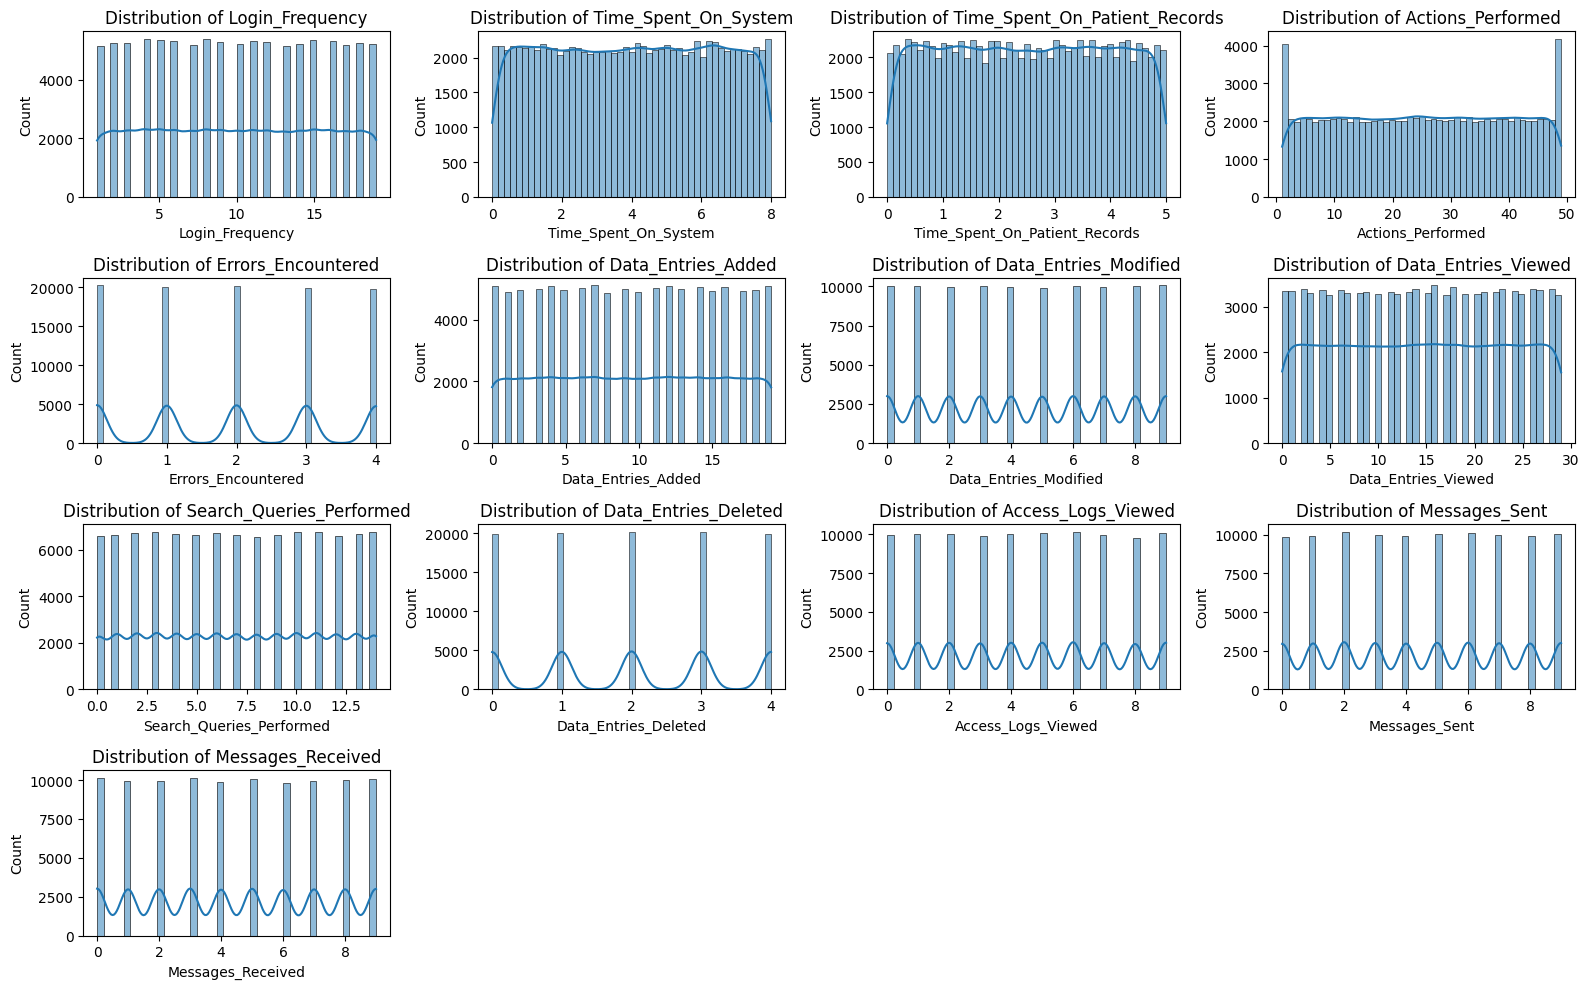

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_features = ['Login_Frequency', 'Time_Spent_On_System', 'Time_Spent_On_Patient_Records',
                      'Actions_Performed', 'Errors_Encountered', 'Data_Entries_Added',
                      'Data_Entries_Modified', 'Data_Entries_Viewed', 'Search_Queries_Performed',
                      'Data_Entries_Deleted', 'Access_Logs_Viewed', 'Messages_Sent', 'Messages_Received']

# Plotting distributions
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


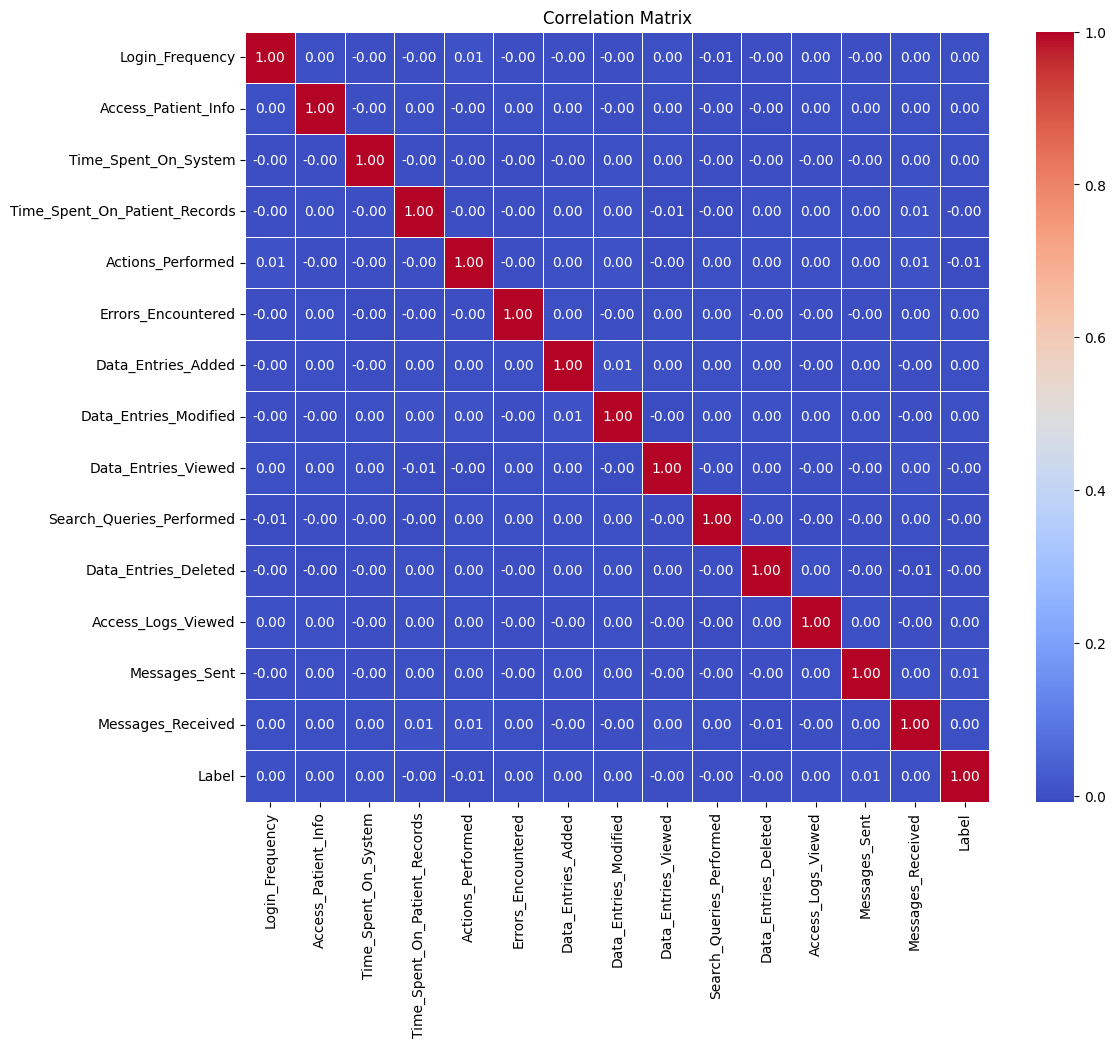

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


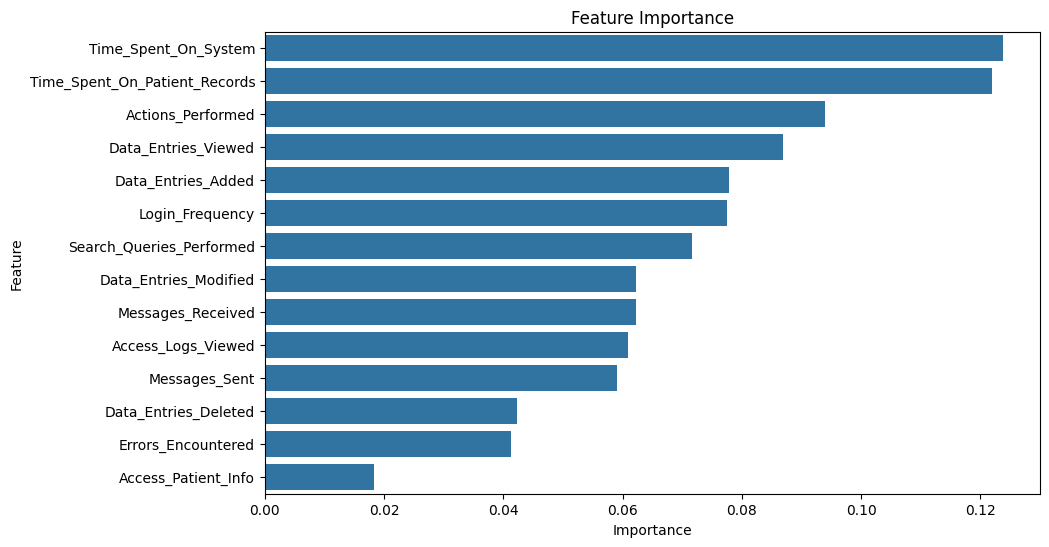

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Import machine learning algorithms
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Train Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train_scaled)

# Predict anomalies
y_pred_train = isolation_forest.predict(X_train_scaled)
y_pred_test = isolation_forest.predict(X_test_scaled)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Initialize models
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
lof = LocalOutlierFactor(contamination=0.1)
one_class_svm = OneClassSVM(nu=0.1)

# Train models
models = {
    "Isolation Forest": isolation_forest,
    "Local Outlier Factor": lof,
    "One-Class SVM": one_class_svm
}

for name, model in models.items():
    model.fit(X_train_scaled)


In [ ]:
from sklearn.metrics import classification_report

# Evaluate models
evaluation_results = {}
for name, model in models.items():
    y_pred_train = model.fit_predict(X_train_scaled)
    y_pred_test = model.fit_predict(X_test_scaled)

    # Convert predictions to binary (0: normal, 1: anomaly)
    y_pred_train_binary = [1 if x == -1 else 0 for x in y_pred_train]
    y_pred_test_binary = [1 if x == -1 else 0 for x in y_pred_test]

    # Calculate evaluation metrics
    train_report = classification_report(y_train, y_pred_train_binary, output_dict=True)
    test_report = classification_report(y_test, y_pred_test_binary, output_dict=True)

    evaluation_results[name] = {
        "Train": train_report,
        "Test": test_report
    }

# Print evaluation results
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    print("Training Metrics:")
    print(metrics['Train'])
    print("Testing Metrics:")
    print(metrics['Test'])
    print("="*50)


Model: Isolation Forest
Training Metrics:
{'0': {'precision': 0.7996805555555555, 'recall': 0.8992191160393566, 'f1-score': 0.8465338528265823, 'support': 64030}, '1': {'precision': 0.193375, 'recall': 0.09686912961803382, 'f1-score': 0.12907801418439716, 'support': 15970}, 'accuracy': 0.73905, 'macro avg': {'precision': 0.49652777777777773, 'recall': 0.4980441228286952, 'f1-score': 0.48780593350548973, 'support': 80000}, 'weighted avg': {'precision': 0.6786468090277779, 'recall': 0.73905, 'f1-score': 0.7033117310376361, 'support': 80000}}
Testing Metrics:
{'0': {'precision': 0.797, 'recall': 0.9001694170797515, 'f1-score': 0.8454489200577541, 'support': 15937}, '1': {'precision': 0.2045, 'recall': 0.10066453359586512, 'f1-score': 0.13491670790037935, 'support': 4063}, 'accuracy': 0.73775, 'macro avg': {'precision': 0.50075, 'recall': 0.5004169753378083, 'f1-score': 0.4901828139790667, 'support': 20000}, 'weighted avg': {'precision': 0.676633625, 'recall': 0.73775, 'f1-score': 0.701104

In [ ]:
import joblib


# Get the best-performing model
best_model = models['One-Class SVM']

# Save the best model
joblib.dump(best_model, 'One-Class SVM.pkl')

['One-Class SVM.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load('/content/One-Class SVM.pkl')

# Create dummy data (example)
dummy_data = pd.DataFrame({
    'Login_Frequency': [18, 5, 8],
    'Access_Patient_Info': [0, 0, 1],
    'Time_Spent_On_System': [5.13, 1, 3],
    'Time_Spent_On_Patient_Records': [0.25, 0.5, 2],
    'Actions_Performed': [22, 10, 15],
    'Errors_Encountered': [3, 1, 0],
    'Data_Entries_Added': [18, 2, 3],
    'Data_Entries_Modified': [5, 1, 2],
    'Data_Entries_Viewed': [27, 5, 8],
    'Search_Queries_Performed': [14, 1, 3],
    'Data_Entries_Deleted': [4, 0, 1],
    'Access_Logs_Viewed': [9, 2, 3],
    'Messages_Sent': [1, 4, 6],
    'Messages_Received': [4, 3, 5]
})

# Preprocess the dummy data (use the same preprocessing steps as before)
# Assuming you have scaler object defined before
dummy_data_scaled = scaler.transform(dummy_data)

# Predict the labels using the loaded model
predictions = loaded_model.predict(dummy_data_scaled)

# Print the predictions
print("Predictions:")
print(predictions)

Predictions:
[-1  1  1]


In [ ]:
#Prediction example 01
 {
  "login_frequency": 18,
  "access_patient_info": 0,
  "time_spent_on_system": 5.13,
  "time_spent_on_patient_records": 0.25,
  "actions_performed": 22,
  "errors_encountered": 3,
  "data_entries_added": 18,
  "data_entries_modified": 5,
  "data_entries_viewed": 27,
  "search_queries_performed": 14,
  "data_entries_deleted": 4,
  "access_logs_viewed": 9,
  "messages_sent": 1,
  "messages_received": 4
}

In [ ]:
#Prediction example 02
{
  "login_frequency": 8,
  "access_patient_info": 1,
  "time_spent_on_system": 3,
  "time_spent_on_patient_records": 2,
  "actions_performed": 15,
  "errors_encountered": 0,
  "data_entries_added": 3,
  "data_entries_modified": 2,
  "data_entries_viewed": 8,
  "search_queries_performed": 3,
  "data_entries_deleted": 1,
  "access_logs_viewed": 3,
  "messages_sent": 6,
  "messages_received": 5
}